# BIen doi am


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


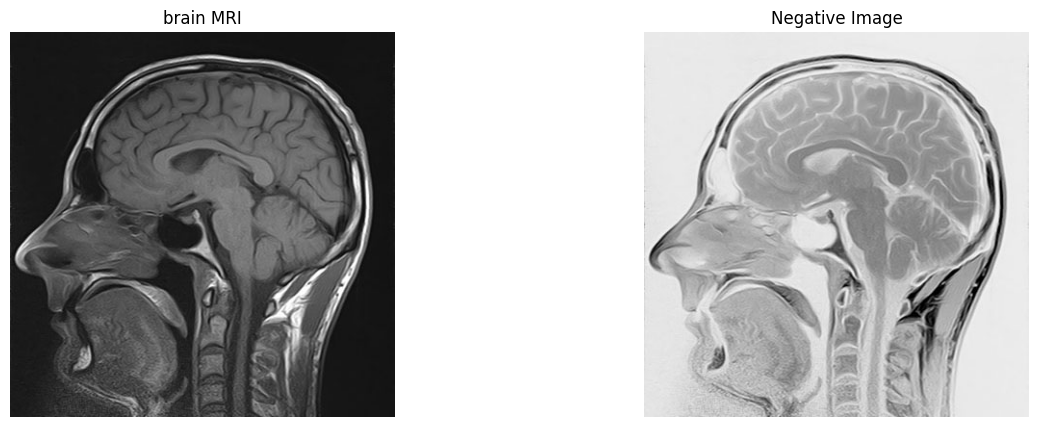

In [2]:
img = cv2.imread('img/brainMRI.jpg',0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
negative = 255-img

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('brain MRI')
plt.axis('off')# xoa truc x y

plt.subplot(1,2,2)
plt.imshow(negative,cmap='gray')
plt.title('Negative Image')
plt.axis('off')# xoa truc x y
plt.show()

In [ ]:
print(negative)

[[[233 233 233]
  [233 233 233]
  [233 233 233]
  ...
  [235 235 235]
  [235 235 235]
  [235 235 235]]

 [[233 233 233]
  [233 233 233]
  [233 233 233]
  ...
  [235 235 235]
  [235 235 235]
  [235 235 235]]

 [[233 233 233]
  [233 233 233]
  [233 233 233]
  ...
  [235 235 235]
  [235 235 235]
  [235 235 235]]

 ...

 [[228 228 228]
  [227 227 227]
  [226 226 226]
  ...
  [235 235 235]
  [236 236 236]
  [236 236 236]]

 [[227 227 227]
  [227 227 227]
  [228 228 228]
  ...
  [235 235 235]
  [236 236 236]
  [236 236 236]]

 [[226 226 226]
  [228 228 228]
  [229 229 229]
  ...
  [235 235 235]
  [236 236 236]
  [236 236 236]]]


## log

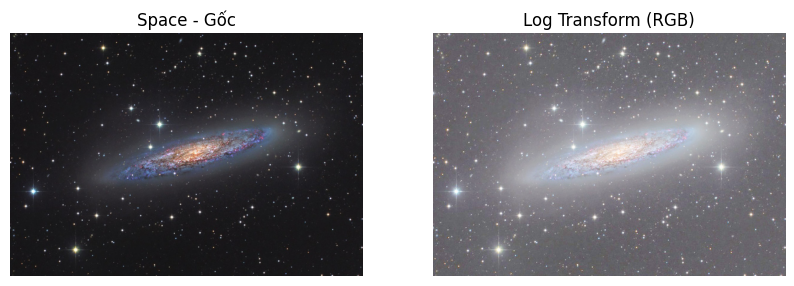

In [3]:

img = cv2.imread('img/space.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Log transform + chuẩn hóa
log_tran = np.log1p(img_rgb.astype(np.float32))   # log(1+r)
log_tran = cv2.normalize(log_tran, None, 0, 255, cv2.NORM_MINMAX)
log_tran = log_tran.astype(np.uint8)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Space - Gốc")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(log_tran)
plt.title("Log Transform (RGB)")
plt.axis("off")

plt.show()


Min: 0
Max: 254


array([[[26, 21, 28],
        [26, 24, 29],
        [22, 22, 22],
        ...,
        [26, 26, 28],
        [25, 26, 28],
        [25, 27, 26]],

       [[23, 21, 24],
        [21, 19, 22],
        [27, 27, 27],
        ...,
        [25, 25, 27],
        [25, 25, 27],
        [25, 25, 27]],

       [[26, 24, 25],
        [23, 21, 22],
        [25, 25, 27],
        ...,
        [25, 23, 26],
        [25, 23, 26],
        [25, 23, 26]],

       ...,

       [[24, 22, 25],
        [24, 22, 25],
        [22, 20, 23],
        ...,
        [24, 24, 26],
        [26, 24, 25],
        [28, 24, 25]],

       [[18, 16, 21],
        [22, 20, 25],
        [26, 24, 27],
        ...,
        [24, 24, 26],
        [29, 25, 26],
        [31, 25, 27]],

       [[22, 20, 25],
        [25, 23, 26],
        [25, 23, 26],
        ...,
        [26, 24, 25],
        [27, 26, 22],
        [27, 25, 26]]], dtype=uint8)
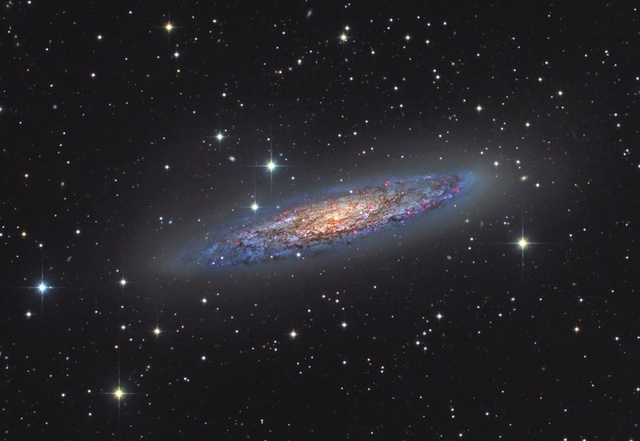

In [24]:
print(f"Min: {log_tran.min()}")
print(f"Max: {log_tran.max()}")
img_rgb

In [4]:
## Power-law / Gamma Correction

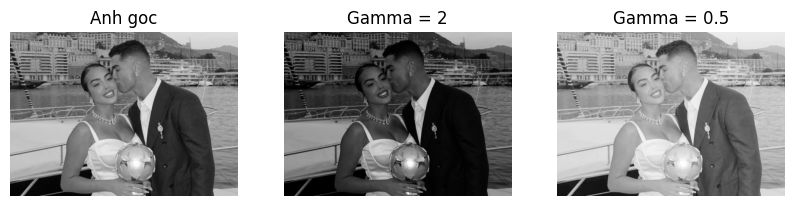

In [4]:
img = cv2.imread('img/ronaldo.jpg',0)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gamma = 2
gamma_corrected = np.array(255 * (img/255) ** gamma, dtype='uint8')

gamma2 = 0.5
gamma_corrected2 = np.array(255 * (img/255) ** gamma2, dtype='uint8')


# Hiển thị 2 ảnh trên cùng 1 Figure
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Anh goc')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title('Gamma = 2')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(gamma_corrected2, cmap='gray')
plt.title('Gamma = 0.5')
plt.axis('off')

plt.show()

array([[192, 192, 194, ..., 236, 236, 236],
       [186, 188, 189, ..., 236, 236, 236],
       [177, 182, 184, ..., 236, 236, 236],
       ...,
       [ 45,  45,  45, ..., 221, 221, 221],
       [ 45,  45,  45, ..., 221, 221, 221],
       [ 45,  45,  45, ..., 221, 221, 221]], dtype=uint8)
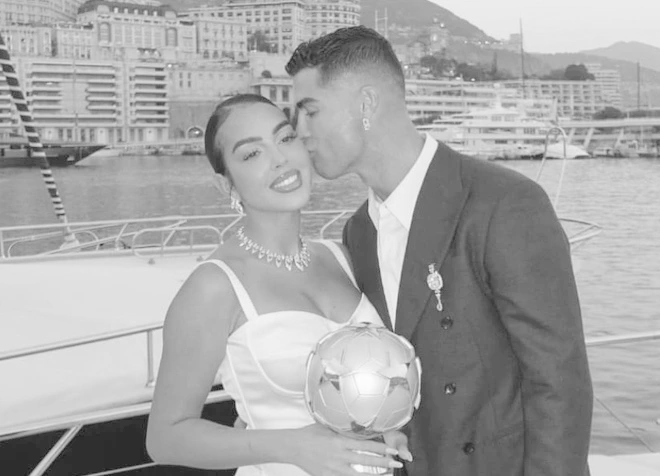

In [18]:
gamma_corrected2

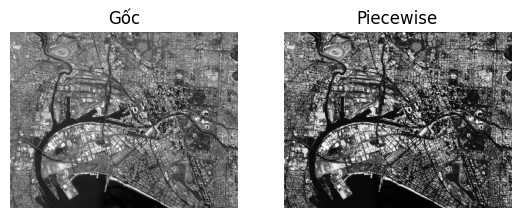

In [5]:
img = cv2.imread('img/Ve tinh.jpg', 0)

# Piecewise transform: 3 đoạn
result = img.copy().astype(float)
result[img <= 85] = img[img <= 85] * 0.35        # Tối hơn
result[(img > 85) & (img <= 170)] = 30 + (img[(img > 85) & (img <= 170)] - 85) * 2  # Contrast cao
result[img > 170] = 200 + (img[img > 170] - 170) * 0.65   # Sáng hơn
result = result.astype(np.uint8)

# Hiển thị
plt.figure(figsize=(10, 3))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Gốc'), plt.axis('off')
plt.subplot(132), plt.imshow(result, cmap='gray'), plt.title('Piecewise'), plt.axis('off')
plt.show()

array([[128, 124, 100, ..., 100,  14, 148],
       [176, 142, 126, ..., 146,  18,  92],
       [134, 114,  82, ...,  94,  24, 112],
       ...,
       [ 74,  40,  96, ...,  26,  90,  84],
       [ 92,  98, 108, ...,  80, 120,  72],
       [186,  90,  29, ...,  40,  29,  54]], dtype=uint8)
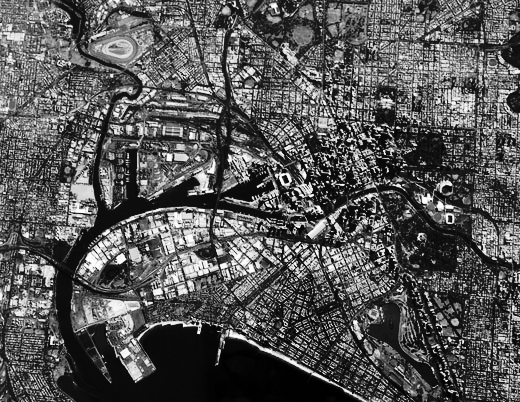

In [21]:
result